Import libraries

In [ ]:
#!pip install pydotplus
!conda install graphviz
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Load in the Insurance Claims dataset

In [2]:
#Load the dataset
Fraud_df = pd.read_csv('insurance_claims.csv')
Fraud_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Replace the missing '?' values with NaN and remove the date features

In [3]:
#Replac all missing (?) values with NaN
Fraud_df = Fraud_df.replace('?', np.nan)

dates = ['policy_bind_date','incident_date']
Fraud_df.drop(dates, inplace = True, axis=1)

Split the features into Categorical and Continuous for the Data Quality Reports

In [4]:
#Determine which features are catgorical and continuous
continuous = ['months_as_customer','age','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

categorical = ['policy_number','policy_state','policy_csl','policy_deductable','insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state','incident_city','incident_location','authorities_contacted','property_damage','police_report_available','auto_make','auto_model','fraud_reported']

#Print each feature in the dataframe
for cols in Fraud_df.columns:
  print(cols)

#Get the number of categorical and continuous features
n_cat = len(categorical)
n_cont = len(continuous)

print(n_cat, n_cont)

months_as_customer
age
policy_number
policy_state
policy_csl
policy_deductable
policy_annual_premium
umbrella_limit
insured_zip
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
capital-gains
capital-loss
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
incident_hour_of_the_day
number_of_vehicles_involved
property_damage
bodily_injuries
witnesses
police_report_available
total_claim_amount
injury_claim
property_claim
vehicle_claim
auto_make
auto_model
auto_year
fraud_reported
_c39
22 15


Calculate the Domain for the Continuous features

In [5]:
#Get the domain for each coninuous feature
rows = []

for col in continuous:
    df_attr = getattr(Fraud_df, col)
    row = pd.DataFrame({"domain":[df_attr.unique()]}, index = [col])
    rows.append(row)

domain_con = pd.concat(rows)
domain_con

,domain
months_as_customer,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4..."
age,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3..."
policy_annual_premium,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ..."
umbrella_limit,"[0, 5000000, 6000000, 4000000, 3000000, 800000..."
capital-gains,"[53300, 0, 35100, 48900, 66000, 38400, 52800, ..."
capital-loss,"[0, -62400, -46000, -77000, -39300, -51000, -3..."
incident_hour_of_the_day,"[5, 8, 7, 20, 19, 0, 23, 21, 14, 22, 9, 12, 15..."
number_of_vehicles_involved,"[1, 3, 4, 2]"
bodily_injuries,"[1, 0, 2]"
witnesses,"[2, 0, 3, 1]"


Calculate the Domain for Categorical features

In [6]:
#Get the domain for each categorical feature
rows = []

for col in categorical:
    df_attr = getattr(Fraud_df, col)
    row = pd.DataFrame({"domain":[df_attr.unique()]}, index = [col])
    rows.append(row)

domain_cat = pd.concat(rows)
domain_cat

,domain
policy_number,"[521585, 342868, 687698, 227811, 367455, 10459..."
policy_state,"[OH, IN, IL]"
policy_csl,"[250/500, 100/300, 500/1000]"
policy_deductable,"[1000, 2000, 500]"
insured_zip,"[466132, 468176, 430632, 608117, 610706, 47845..."
insured_sex,"[MALE, FEMALE]"
insured_education_level,"[MD, PhD, Associate, Masters, High School, Col..."
insured_occupation,"[craft-repair, machine-op-inspct, sales, armed..."
insured_hobbies,"[sleeping, reading, board-games, bungie-jumpin..."
insured_relationship,"[husband, other-relative, own-child, unmarried..."


Creating Data Quality Reports: Categorical

In [7]:
#Create the Data Quality Report for categorical features
rows = []

for col in categorical:
    df_attr = getattr(Fraud_df, col)
    row = pd.DataFrame({
        "Count":[df_attr.count()],
        "% of Missing":[(df_attr.isna().sum()/len(df_attr))*100],
        "Card.":[df_attr.nunique()], 
        "Mode":[pd.DataFrame(df_attr.value_counts()).reset_index().iloc[0][0]],
        "Mode Freq.":[pd.DataFrame(df_attr.value_counts()).reset_index().iloc[0][1]],
        "Mode %":[(pd.DataFrame(df_attr.value_counts()).reset_index().iloc[0][1])/df_attr.count()*100], 
        "2nd Mode":[pd.DataFrame(df_attr.value_counts()).reset_index().iloc[1][0]],
        "2nd Mode Freq.":[pd.DataFrame(df_attr.value_counts()).reset_index().iloc[1][1]],
        "2nd Mode Perc":[(pd.DataFrame(df_attr.value_counts()).reset_index().iloc[1][1])/df_attr.count()*100]
    }, index = [col])
                      
    rows.append(row)

qual_cat = pd.concat(rows)
qual_cat

,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode Perc
policy_number,1000,0.0,1000,521585,1,0.100000,687755,1,0.100000
policy_state,1000,0.0,3,OH,352,35.200000,IL,338,33.800000
policy_csl,1000,0.0,3,250/500,351,35.100000,100/300,349,34.900000
policy_deductable,1000,0.0,3,1000,351,35.100000,500,342,34.200000
insured_zip,1000,0.0,995,477695,2,0.200000,469429,2,0.200000
insured_sex,1000,0.0,2,FEMALE,537,53.700000,MALE,463,46.300000
insured_education_level,1000,0.0,7,JD,161,16.100000,High School,160,16.000000
insured_occupation,1000,0.0,14,machine-op-inspct,93,9.300000,prof-specialty,85,8.500000
insured_hobbies,1000,0.0,20,reading,64,6.400000,exercise,57,5.700000
insured_relationship,1000,0.0,6,own-child,183,18.300000,other-relative,177,17.700000


Creating the Data Quality Reports: Continuous

In [8]:
#Create the Data Quality Report for continuous features

rows = []

for col in continuous:
    df_attr = getattr(Fraud_df, col)
    row = pd.DataFrame({"Count":[df_attr.count()],
                        "% of Missing":[(df_attr.isna().sum()/len(df_attr))*100],
                        "Card.":[df_attr.nunique()], 
                        "Min.":[df_attr.min()], 
                        "Q1":[df_attr.quantile(.25)],
                        "Median":[df_attr.median()], 
                        "Q3":[df_attr.quantile(.75)],
                        "Max.":[df_attr.max()],
                        "Mean":[df_attr.mean()],
                        "Std.Dev.":[df_attr.std()]
                       }, index = [col])
    rows.append(row)

qual_con = pd.concat(rows)
qual_con

,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std.Dev.
months_as_customer,1000,0.0,391,0.00,115.7500,199.5,276.250,479.00,2.039540e+02,1.151132e+02
age,1000,0.0,46,19.00,32.0000,38.0,44.000,64.00,3.894800e+01,9.140287e+00
policy_annual_premium,1000,0.0,991,433.33,1089.6075,1257.2,1415.695,2047.59,1.256406e+03,2.441674e+02
umbrella_limit,1000,0.0,11,-1000000.00,0.0000,0.0,0.000,10000000.00,1.101000e+06,2.297407e+06
capital-gains,1000,0.0,338,0.00,0.0000,0.0,51025.000,100500.00,2.512610e+04,2.787219e+04
capital-loss,1000,0.0,354,-111100.00,-51500.0000,-23250.0,0.000,0.00,-2.679370e+04,2.810410e+04
incident_hour_of_the_day,1000,0.0,24,0.00,6.0000,12.0,17.000,23.00,1.164400e+01,6.951373e+00
number_of_vehicles_involved,1000,0.0,4,1.00,1.0000,1.0,3.000,4.00,1.839000e+00,1.018880e+00
bodily_injuries,1000,0.0,3,0.00,0.0000,1.0,2.000,2.00,9.920000e-01,8.201272e-01
witnesses,1000,0.0,4,0.00,1.0000,1.0,2.000,3.00,1.487000e+00,1.111335e+00


Handling Missing Values

In [9]:
#Show all features with missing values
Fraud_df = Fraud_df.replace('?', np.nan)
Fraud_df.isna().sum() 

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

In [10]:
#Perform mode imputation on the missing values
Fraud_df = Fraud_df.drop('_c39',axis=1) 
Fraud_df['collision_type']=Fraud_df['collision_type'].fillna(Fraud_df['collision_type'].mode()[0])
Fraud_df['property_damage']=Fraud_df['property_damage'].fillna(Fraud_df['property_damage'].mode()[0])
Fraud_df['police_report_available']=Fraud_df['police_report_available'].fillna(Fraud_df['police_report_available'].mode()[0])


In [11]:
#Visualize th features with missing values after mode imputation
Fraud_df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

The new dataframe after performing mode imputation

In [12]:
#The cleaned Dataframe
Fraud_df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Create a Correlation Matrix to visualize feature correlations

C:\Users\Cassa\AppData\Local\Temp\ipykernel_9340\1297276809.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
C:\Users\Cassa\AppData\Local\Temp\ipykernel_9340\1297276809.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


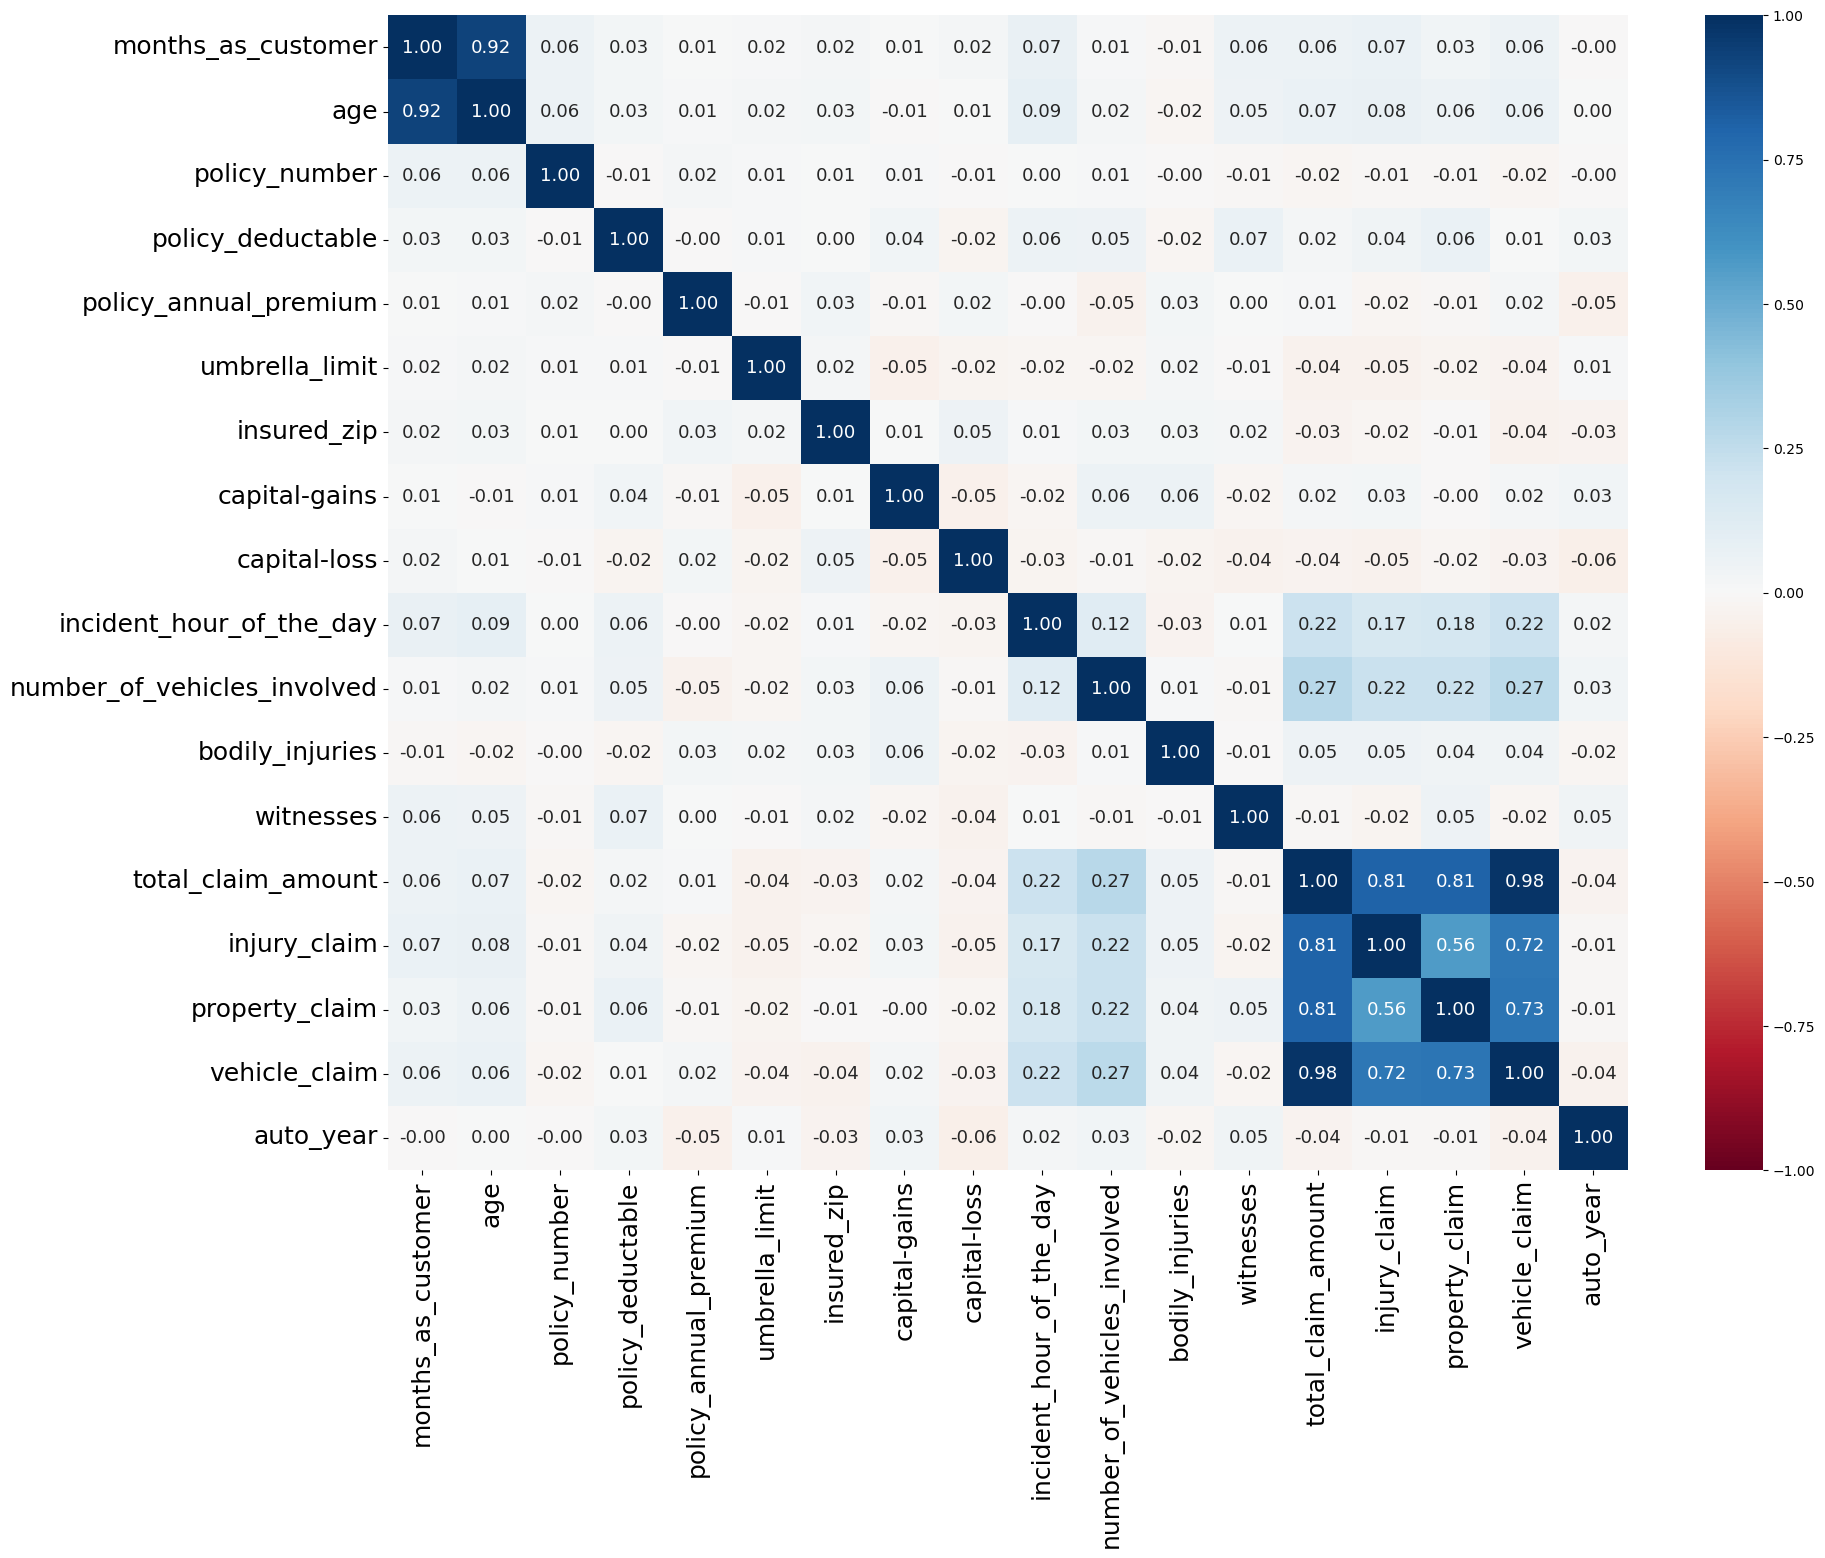

In [13]:
fig, ax = plt.subplots(figsize=(20,15)) 
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
sns.heatmap(Fraud_df.corr(), annot=True, annot_kws={"fontsize":13}, fmt=".2f", vmin=-1, vmax=1, cmap="RdBu", center=0);



Feature Selction: Removing Irrelevant Features

In [14]:
#Wecan remove these categorical features since they contain multiple levels in their domains or they are dates and irrelevant to dtecting fraud
cat_drop = ['policy_number','policy_state','insured_zip','insured_hobbies','incident_state','incident_city','incident_location','auto_make','auto_model','auto_year']

Fraud_df.drop(cat_drop,inplace = True, axis=1)
Fraud_df


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,...,1,YES,0,1,NO,87200,17440,8720,61040,N
996,285,41,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,...,1,YES,2,3,NO,108480,18080,18080,72320,N
997,130,34,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,...,3,NO,2,3,YES,67500,7500,7500,52500,N
998,458,62,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,...,1,NO,0,1,YES,46980,5220,5220,36540,N


Feature Selection: Removing Highly Correlated Features

In [15]:
#Now we can remove highly correlated features, highly correlated features can increase the complexity of the algorithm and thus increase
#the risk of errors

#By looking at the correlation matrix we see age and months as customer are highly correlated,so we can remove age since months as a customer
#is more relevent to the business

#There is also a high correlation between total claim, injury claim, property claim, and vehicle claim. Since total claim is just the total
#sum of all the claims we can rmove this feature
high_corr = ['age','total_claim_amount']

Fraud_df.drop(high_corr,inplace = True, axis=1)


The New dataframe

In [16]:
y = Fraud_df['fraud_reported']
Fraud_df

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,...,20,1,YES,0,1,NO,17440,8720,61040,N
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,...,23,1,YES,2,3,NO,18080,18080,72320,N
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,4,3,NO,2,3,YES,7500,7500,52500,N
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,...,2,1,NO,0,1,YES,5220,5220,36540,N


In [17]:
#Observing all features in Fraud_df now
for cols in Fraud_df.columns:
  print(cols)

months_as_customer
policy_csl
policy_deductable
policy_annual_premium
umbrella_limit
insured_sex
insured_education_level
insured_occupation
insured_relationship
capital-gains
capital-loss
incident_type
collision_type
incident_severity
authorities_contacted
incident_hour_of_the_day
number_of_vehicles_involved
property_damage
bodily_injuries
witnesses
police_report_available
injury_claim
property_claim
vehicle_claim
fraud_reported


Model Evaluation Preparation: Converting Categorical Features to Numerical

In [18]:
#Now we can convert the categorical features to numerical to evaluate in the models
Fraud_Cat = Fraud_df.select_dtypes(include = ['object'])

Fraud_Cat = pd.get_dummies(Fraud_Cat)
Fraud_Cat

,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,fraud_reported_N,fraud_reported_Y
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
4,0,0,1,0,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
996,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
997,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
998,0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


In [19]:
#Then we can extract the numerical features of the dataframe
Fraud_Cont = Fraud_df.select_dtypes(include = ['int64','float64'])
Fraud_Cont

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,17440,8720,61040
996,285,1000,1436.79,0,70900,0,23,1,2,3,18080,18080,72320
997,130,500,1383.49,3000000,35100,0,4,3,2,3,7500,7500,52500
998,458,2000,1356.92,5000000,0,0,2,1,0,1,5220,5220,36540


Model Evaluation Preparation: Concatenating the Continuous and Categorical Features

In [20]:
#Now concatenate the two Dataframes for model evaluation
Fraud_df_total = pd.concat([Fraud_Cont,Fraud_Cat], axis = 1)
Fraud_df_total

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,fraud_reported_N,fraud_reported_Y
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,0,0,0,1,0,1,0,1,0,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0,0,0,1,1,0,1,0,0,1
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,0,0,1,1,0,1,0,1,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,0,0,1,1,0,1,0,0,1
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,...,1,0,0,0,0,1,1,0,1,0
996,285,1000,1436.79,0,70900,0,23,1,2,3,...,1,0,0,0,0,1,1,0,1,0
997,130,500,1383.49,3000000,35100,0,4,3,2,3,...,0,0,0,1,1,0,0,1,1,0
998,458,2000,1356.92,5000000,0,0,2,1,0,1,...,0,0,1,0,1,0,0,1,1,0


In [21]:
#Observing all features in processed DataFrame
for cols in Fraud_df_total.columns:
  print(cols)

months_as_customer
policy_deductable
policy_annual_premium
umbrella_limit
capital-gains
capital-loss
incident_hour_of_the_day
number_of_vehicles_involved
bodily_injuries
witnesses
injury_claim
property_claim
vehicle_claim
policy_csl_100/300
policy_csl_250/500
policy_csl_500/1000
insured_sex_FEMALE
insured_sex_MALE
insured_education_level_Associate
insured_education_level_College
insured_education_level_High School
insured_education_level_JD
insured_education_level_MD
insured_education_level_Masters
insured_education_level_PhD
insured_occupation_adm-clerical
insured_occupation_armed-forces
insured_occupation_craft-repair
insured_occupation_exec-managerial
insured_occupation_farming-fishing
insured_occupation_handlers-cleaners
insured_occupation_machine-op-inspct
insured_occupation_other-service
insured_occupation_priv-house-serv
insured_occupation_prof-specialty
insured_occupation_protective-serv
insured_occupation_sales
insured_occupation_tech-support
insured_occupation_transport-movin

The new Data Quality Reports

In [22]:
rows = []

for col in Fraud_Cat.columns:
    df_attr = getattr(Fraud_Cat, col)
    row = pd.DataFrame({
        "Count":[df_attr.count()],
        "% of Missing":[(df_attr.isna().sum()/len(df_attr))*100],
        "Card.":[df_attr.nunique()], 
        "Mode":[pd.DataFrame(df_attr.value_counts()).reset_index().iloc[0][0]],
        "Mode Freq.":[pd.DataFrame(df_attr.value_counts()).reset_index().iloc[0][1]],
        "Mode %":[(pd.DataFrame(df_attr.value_counts()).reset_index().iloc[0][1])/df_attr.count()*100], 
        "2nd Mode":[pd.DataFrame(df_attr.value_counts()).reset_index().iloc[1][0]],
        "2nd Mode Freq.":[pd.DataFrame(df_attr.value_counts()).reset_index().iloc[1][1]],
        "2nd Mode Perc":[(pd.DataFrame(df_attr.value_counts()).reset_index().iloc[1][1])/df_attr.count()*100]
    }, index = [col])
                      
    rows.append(row)

new_qual_cat = pd.concat(rows)
new_qual_cat

,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode Perc
policy_csl_100/300,1000,0.0,2,0.0,651.0,65.1,1.0,349.0,34.9
policy_csl_250/500,1000,0.0,2,0.0,649.0,64.9,1.0,351.0,35.1
policy_csl_500/1000,1000,0.0,2,0.0,700.0,70.0,1.0,300.0,30.0
insured_sex_FEMALE,1000,0.0,2,1.0,537.0,53.7,0.0,463.0,46.3
insured_sex_MALE,1000,0.0,2,0.0,537.0,53.7,1.0,463.0,46.3
insured_education_level_Associate,1000,0.0,2,0.0,855.0,85.5,1.0,145.0,14.5
insured_education_level_College,1000,0.0,2,0.0,878.0,87.8,1.0,122.0,12.2
insured_education_level_High School,1000,0.0,2,0.0,840.0,84.0,1.0,160.0,16.0
insured_education_level_JD,1000,0.0,2,0.0,839.0,83.9,1.0,161.0,16.1
insured_education_level_MD,1000,0.0,2,0.0,856.0,85.6,1.0,144.0,14.4


In [23]:
rows = []

for col in Fraud_Cont.columns:
    df_attr = getattr(Fraud_Cont, col)
    row = pd.DataFrame({"Count":[df_attr.count()],
                        "% of Missing":[(df_attr.isna().sum()/len(df_attr))*100],
                        "Card.":[df_attr.nunique()], 
                        "Min.":[df_attr.min()], 
                        "Q1":[df_attr.quantile(.25)],
                        "Median":[df_attr.median()], 
                        "Q3":[df_attr.quantile(.75)],
                        "Max.":[df_attr.max()],
                        "Mean":[df_attr.mean()],
                        "Std.Dev.":[df_attr.std()]
                       }, index = [col])
    rows.append(row)

qual_con = pd.concat(rows)
qual_con

,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std.Dev.
months_as_customer,1000,0.0,391,0.00,115.7500,199.5,276.250,479.00,2.039540e+02,1.151132e+02
policy_deductable,1000,0.0,3,500.00,500.0000,1000.0,2000.000,2000.00,1.136000e+03,6.118647e+02
policy_annual_premium,1000,0.0,991,433.33,1089.6075,1257.2,1415.695,2047.59,1.256406e+03,2.441674e+02
umbrella_limit,1000,0.0,11,-1000000.00,0.0000,0.0,0.000,10000000.00,1.101000e+06,2.297407e+06
capital-gains,1000,0.0,338,0.00,0.0000,0.0,51025.000,100500.00,2.512610e+04,2.787219e+04
capital-loss,1000,0.0,354,-111100.00,-51500.0000,-23250.0,0.000,0.00,-2.679370e+04,2.810410e+04
incident_hour_of_the_day,1000,0.0,24,0.00,6.0000,12.0,17.000,23.00,1.164400e+01,6.951373e+00
number_of_vehicles_involved,1000,0.0,4,1.00,1.0000,1.0,3.000,4.00,1.839000e+00,1.018880e+00
bodily_injuries,1000,0.0,3,0.00,0.0000,1.0,2.000,2.00,9.920000e-01,8.201272e-01
witnesses,1000,0.0,4,0.00,1.0000,1.0,2.000,3.00,1.487000e+00,1.111335e+00


Visualizing Bar plots of the Catgorical Features

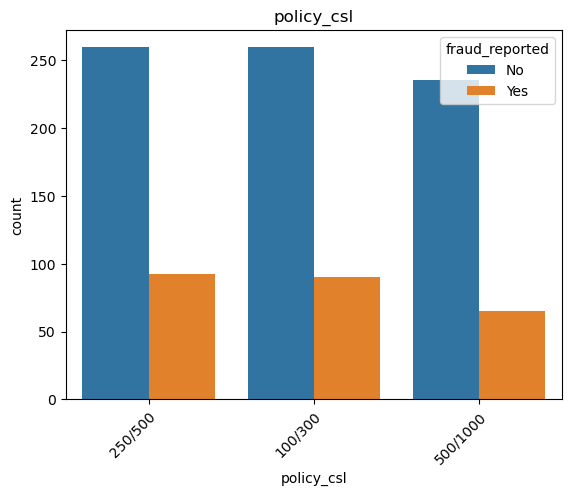

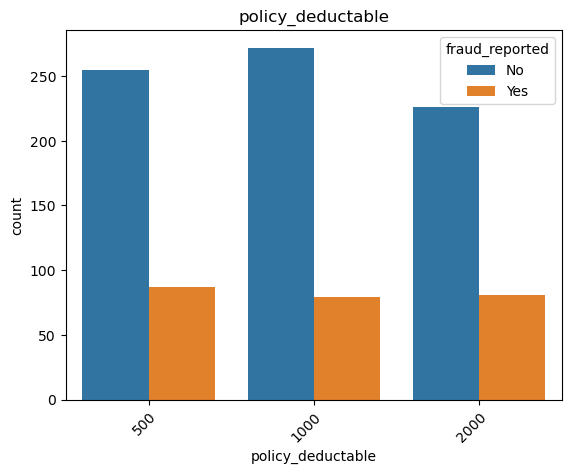

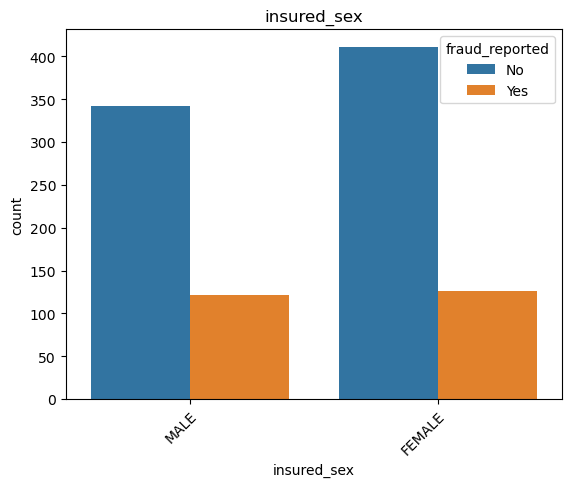

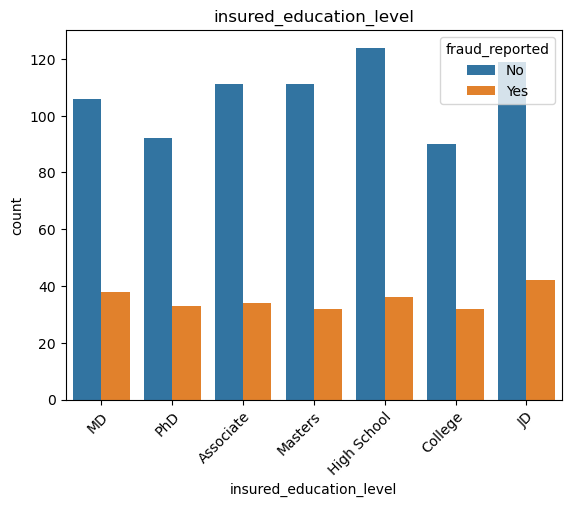

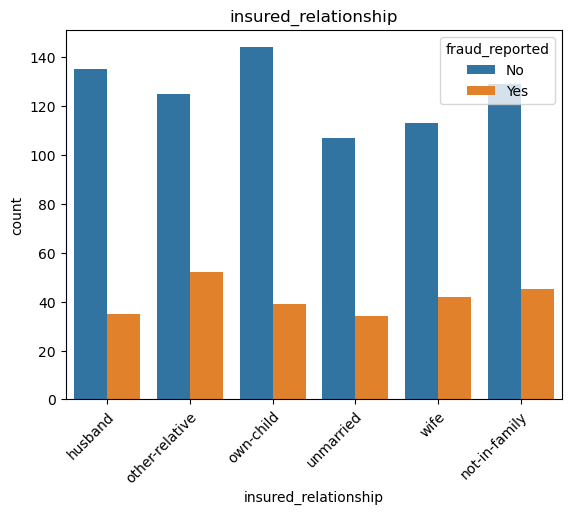

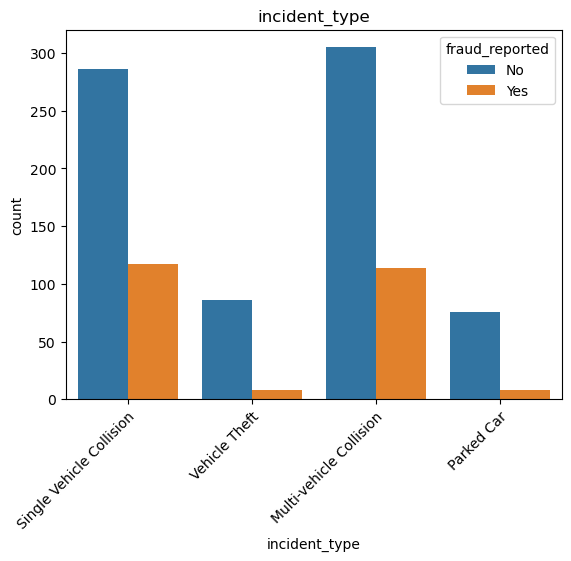

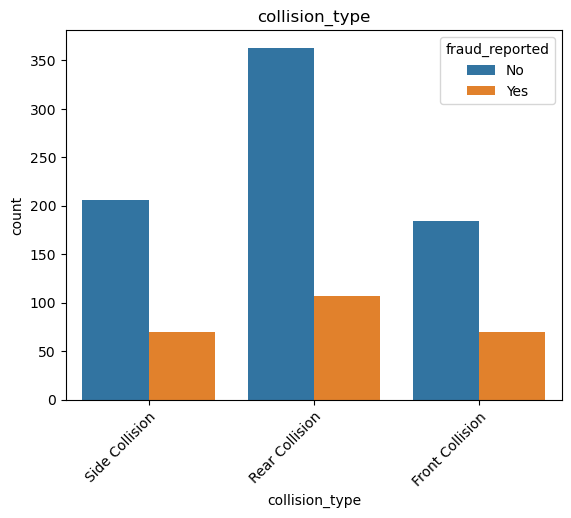

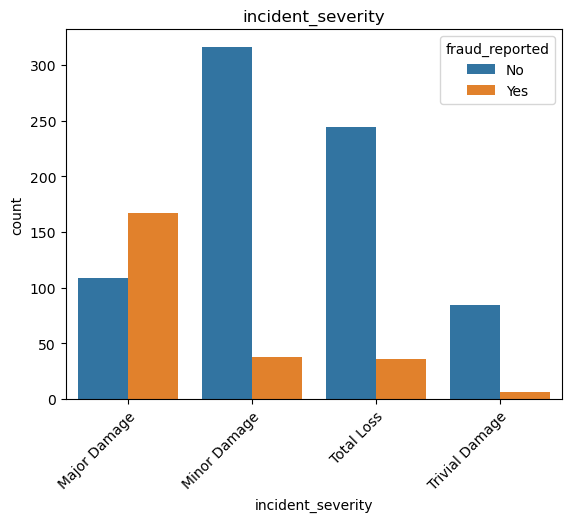

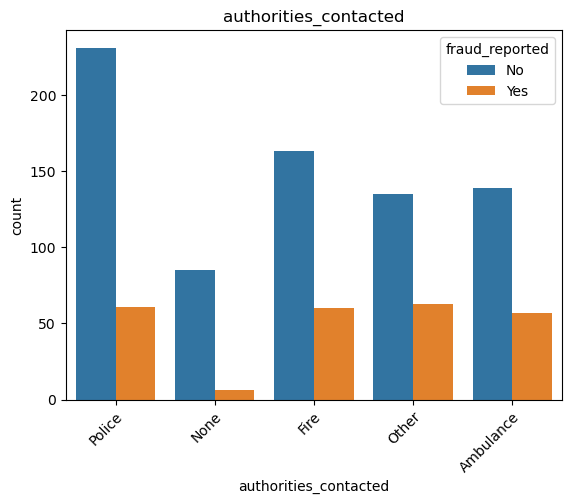

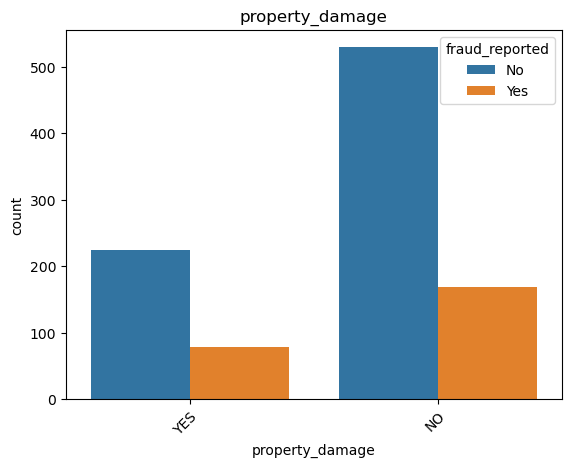

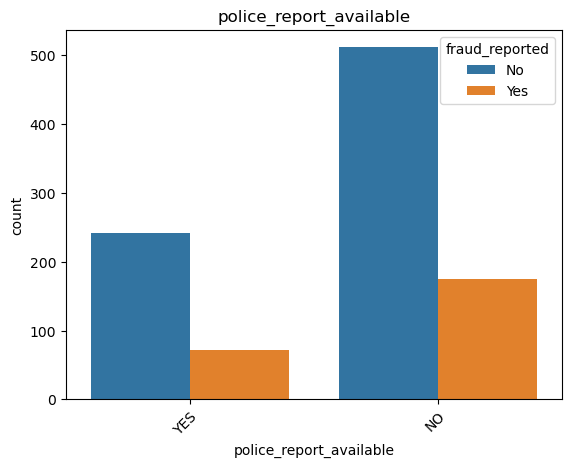

In [24]:
Fraud_df["fraud_reported"] = Fraud_df["fraud_reported"].replace({"Y": 1, "N": 0})
cat_bars = Fraud_df[['policy_csl','policy_deductable','insured_sex','insured_education_level','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','property_damage','police_report_available','fraud_reported']]
for col in cat_bars.columns[:-1]:
    plt.figure()
    sns.countplot(x=col, hue='fraud_reported', data=cat_bars)
    plt.title(col)
    plt.legend(title='fraud_reported', labels=['No', 'Yes'])
    plt.xticks(rotation=45, ha='right',rotation_mode='anchor')
    plt.show()



Visualizing Box Plots to determine outliers

<AxesSubplot:xlabel='property_claim'>

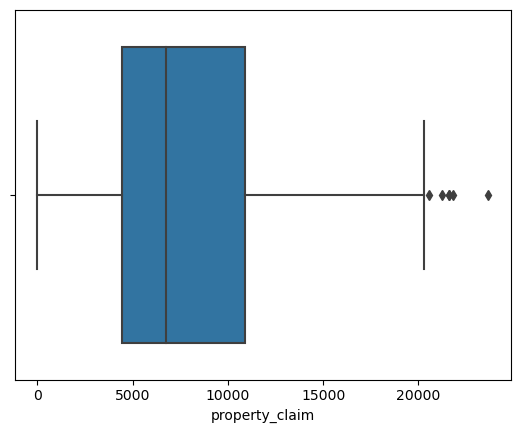

In [25]:
sns.boxplot(x="property_claim", data=Fraud_df)

<AxesSubplot:xlabel='injury_claim'>

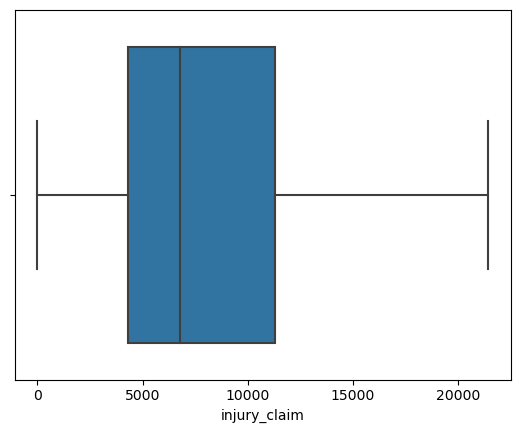

In [26]:
sns.boxplot(x="injury_claim", data=Fraud_df)

<AxesSubplot:xlabel='umbrella_limit'>

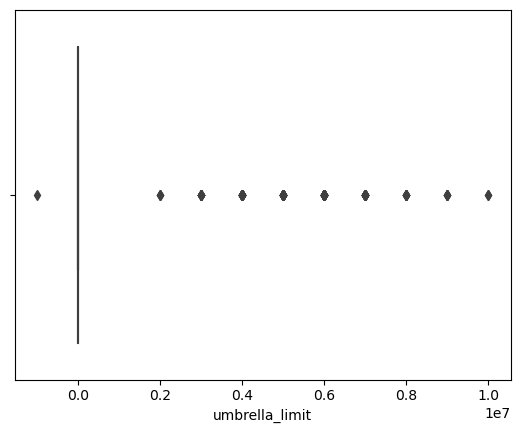

In [27]:
sns.boxplot(x="umbrella_limit", data=Fraud_df)

<AxesSubplot:xlabel='policy_annual_premium'>

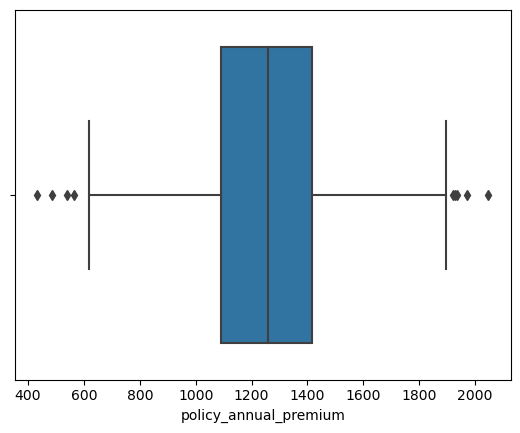

In [28]:
sns.boxplot(x="policy_annual_premium", data=Fraud_df)

Creating the IQR Transform Boundary Values Table

In [29]:
# Creating IQR transform boundary values table
outlier_IQR = pd.DataFrame(data= qual_con, columns=['Q1', 'Q3'])
outlier_IQR['IQR'] = outlier_IQR.Q3 - outlier_IQR.Q1
outlier_IQR['lower'] = outlier_IQR.Q1 - (1.5 * outlier_IQR.IQR)
outlier_IQR['upper'] = outlier_IQR.Q3 + (1.5 * outlier_IQR.IQR)
outlier_IQR

,Q1,Q3,IQR,lower,upper
months_as_customer,115.7500,276.250,160.5000,-125.00000,517.00000
policy_deductable,500.0000,2000.000,1500.0000,-1750.00000,4250.00000
policy_annual_premium,1089.6075,1415.695,326.0875,600.47625,1904.82625
umbrella_limit,0.0000,0.000,0.0000,0.00000,0.00000
capital-gains,0.0000,51025.000,51025.0000,-76537.50000,127562.50000
capital-loss,-51500.0000,0.000,51500.0000,-128750.00000,77250.00000
incident_hour_of_the_day,6.0000,17.000,11.0000,-10.50000,33.50000
number_of_vehicles_involved,1.0000,3.000,2.0000,-2.00000,6.00000
bodily_injuries,0.0000,2.000,2.0000,-3.00000,5.00000
witnesses,1.0000,2.000,1.0000,-0.50000,3.50000


Handling the Outliers

In [30]:
# Handling Outliers - IQR transformation 
Fraud_Cont_New = Fraud_Cont

outliers = Fraud_Cont_New.columns

for col in outliers:
    df_attr = getattr(Fraud_Cont_New, col)
    for idx in Fraud_Cont_New.index:
        if df_attr.iloc[idx] < outlier_IQR['lower'].loc[col]:
            Fraud_Cont_New.loc[idx, col] = outlier_IQR['lower'].loc[col]
        elif df_attr.iloc[idx] > outlier_IQR['upper'].loc[col]:
            Fraud_Cont_New.loc[idx, col] = outlier_IQR['upper'].loc[col]
        else:
            Fraud_Cont_New.loc[idx, col] = Fraud_Cont_New.loc[idx, col]

<AxesSubplot:xlabel='property_claim'>

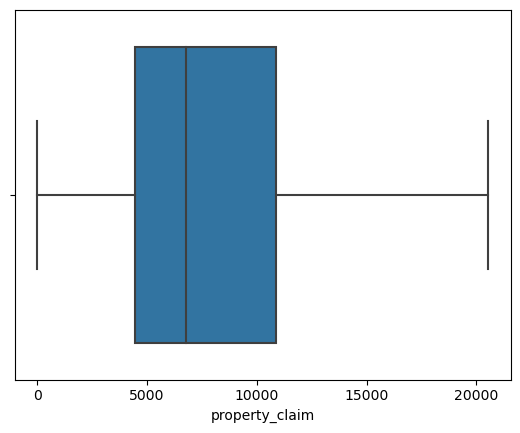

In [31]:
sns.boxplot(x="property_claim", data=Fraud_Cont)

<AxesSubplot:xlabel='policy_annual_premium'>

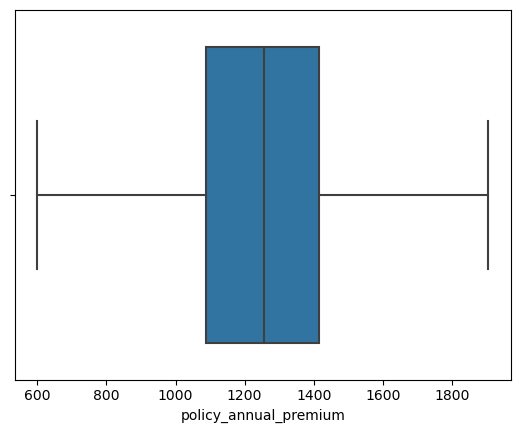

In [32]:
sns.boxplot(x="policy_annual_premium", data=Fraud_Cont)

Concatnate the Continuous feature dataframe with removed outliers and the categorical dataframe

In [33]:
Fraud_df_total_new = pd.concat([Fraud_Cont_New,Fraud_Cat], axis = 1)
Fraud_df_total_new

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,fraud_reported_N,fraud_reported_Y
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,0,0,0,1,0,1,0,1,0,1
1,228,2000,1197.22,0,0,0,8,1,0,0,...,0,0,0,1,1,0,1,0,0,1
2,134,2000,1413.14,0,35100,0,7,3,2,3,...,0,0,0,1,1,0,1,0,1,0
3,256,2000,1415.74,0,48900,-62400,5,1,1,2,...,0,0,0,1,1,0,1,0,0,1
4,228,1000,1583.91,0,66000,-46000,20,1,0,1,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,...,1,0,0,0,0,1,1,0,1,0
996,285,1000,1436.79,0,70900,0,23,1,2,3,...,1,0,0,0,0,1,1,0,1,0
997,130,500,1383.49,0,35100,0,4,3,2,3,...,0,0,0,1,1,0,0,1,1,0
998,458,2000,1356.92,0,0,0,2,1,0,1,...,0,0,1,0,1,0,0,1,1,0


Model Evaluation: Scale the dataframe from -1 to 1

In [34]:

Fraud_df_total_new.drop(['fraud_reported_N','fraud_reported_Y'],inplace = True, axis=1)

scaler = StandardScaler()
scaled = scaler.fit_transform(Fraud_df_total_new)
Fraud_scaled = pd.DataFrame(scaled, columns = Fraud_df_total_new.columns)
Fraud_scaled

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,1.078140,-0.222383,0.621182,0.0,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,...,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,-1.520282,1.520282,-1.478078,1.478078
1,0.208995,1.412784,-0.244857,0.0,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,...,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,0.657773,-0.657773,0.676554,-0.676554
2,-0.608002,1.412784,0.646913,0.0,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,...,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,0.657773,-0.657773,0.676554,-0.676554
3,0.452355,1.412784,0.657651,0.0,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,...,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,0.657773,-0.657773,0.676554,-0.676554
4,0.208995,-0.222383,1.352209,0.0,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,...,-0.314485,-0.493742,-0.535725,3.160540,-0.496873,-0.642207,0.657773,-0.657773,0.676554,-0.676554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.222383,0.224239,0.0,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,...,-0.314485,-0.493742,1.866629,-0.316402,-0.496873,-0.642207,-1.520282,1.520282,0.676554,-0.676554
996,0.704407,-0.222383,0.744590,0.0,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,...,-0.314485,-0.493742,1.866629,-0.316402,-0.496873,-0.642207,-1.520282,1.520282,0.676554,-0.676554
997,-0.642767,-1.039966,0.524455,0.0,0.358023,0.953851,-1.100189,1.140056,1.229693,1.362107,...,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,0.657773,-0.657773,-1.478078,1.478078
998,2.208028,1.412784,0.414719,0.0,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,-0.438431,...,-0.314485,-0.493742,-0.535725,-0.316402,2.012587,-0.642207,0.657773,-0.657773,-1.478078,1.478078


In [35]:
#Get the Accuracy Mean from Cross Validation Score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


#Use the continuous dataframe to test and train on
X = Fraud_scaled
#Target values are the fraud reported features
Y = y

#Function for performing cross validation on each classifier model
def cross_val(X,y,clf,clf_string,cv = 5):
  scores = cross_val_score(clf,X,y,cv=cv)
  print('Model: {} \nAccuracy Mean: {:0.2f}%'.format(clf_string,scores.mean()))

#Append each classifier to a list of classifier models with their string name
clfs = []
clfs.append([LogisticRegression(),"Logistic Regression"])
clfs.append([AdaBoostClassifier(),'AdaBoost'])
clfs.append([SVC(),'Support Vector Machine'])
clfs.append([KNeighborsClassifier(),'K-Nearest Neighbors'])
clfs.append([DecisionTreeClassifier(),'Decision Tree'])
clfs.append([RandomForestClassifier(),'Random Forest Classifier'])

#Run the cross validation accuracy score function on each classifier model and print the accuracy
for clf, clf_string in clfs:
  accuracy_mean = cross_val(X,Y,clf,clf_string)
  
  

 #Support Vector Machine or Random Forest Classifier seems to be the best models to test and predict on           

Model: Logistic Regression 
Accuracy Mean: 0.79%
Model: AdaBoost 
Accuracy Mean: 0.78%
Model: Support Vector Machine 
Accuracy Mean: 0.80%
Model: K-Nearest Neighbors 
Accuracy Mean: 0.74%
Model: Decision Tree 
Accuracy Mean: 0.70%


C:\Users\Cassa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Cassa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Model: Random Forest Classifier 
Accuracy Mean: 0.79%


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Train test split the dataset with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2, random_state = 10)

lr = LogisticRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('Logistic Rgrssion\nAccuracy Score: ', lr_accuracy)

lr_cm = confusion_matrix(y_test,lr_pred)
print('\nConfusion Matrix:\n',lr_cm)

lr_class = classification_report(y_test,lr_pred)
print('\nClassification Report\n', lr_class)

Logistic Rgrssion
Accuracy Score:  0.79

Confusion Matrix:
 [[136  15]
 [ 27  22]]

Classification Report
               precision    recall  f1-score   support

           N       0.83      0.90      0.87       151
           Y       0.59      0.45      0.51        49

    accuracy                           0.79       200
   macro avg       0.71      0.67      0.69       200
weighted avg       0.78      0.79      0.78       200



Text(0.5, 1.0, 'Logistic Regression Confustion Matrix')

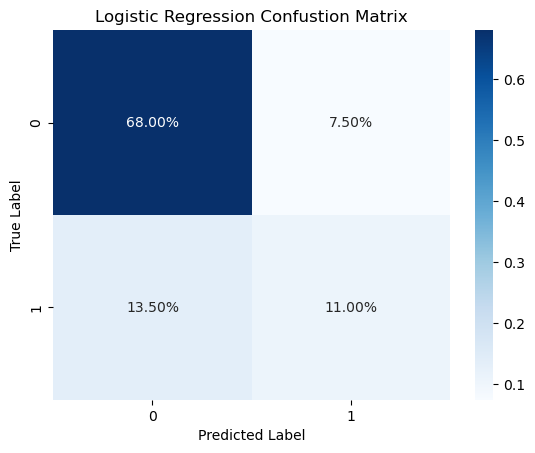

In [37]:
plt.figure()
sns.heatmap(lr_cm/np.sum(lr_cm), annot = True, fmt = '.2%',cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Logistic Regression Confustion Matrix')

In [38]:
ada = AdaBoostClassifier()

ada.fit(X_train,y_train)

ada_pred = ada.predict(X_test)

ada_accuracy = accuracy_score(y_test, ada_pred)
print('AdaBoost Classifier\nAccuracy Score: ', ada_accuracy)

ada_cm = confusion_matrix(y_test,ada_pred)
print('\nConfusion Matrix:\n',ada_cm)

ada_class = classification_report(y_test,ada_pred)
print('\nClassification Report\n', ada_class)

AdaBoost Classifier
Accuracy Score:  0.785

Confusion Matrix:
 [[135  16]
 [ 27  22]]

Classification Report
               precision    recall  f1-score   support

           N       0.83      0.89      0.86       151
           Y       0.58      0.45      0.51        49

    accuracy                           0.79       200
   macro avg       0.71      0.67      0.68       200
weighted avg       0.77      0.79      0.78       200



Text(0.5, 1.0, 'AdaBoost Classifier Confustion Matrix')

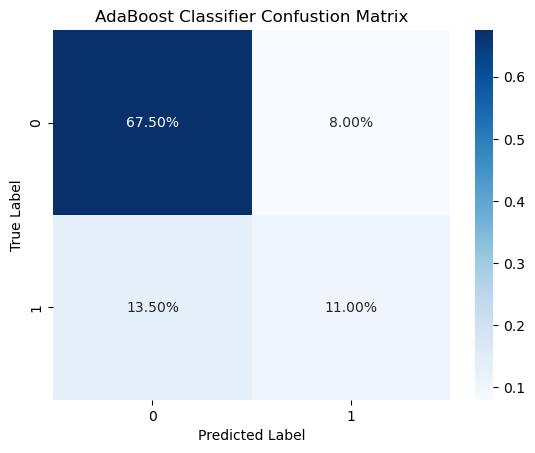

In [39]:
plt.figure()
sns.heatmap(ada_cm/np.sum(ada_cm), annot = True, fmt = '.2%',cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('AdaBoost Classifier Confustion Matrix')

In [40]:
svm_none = SVC()
svm_weighted = SVC(class_weight={'N':0.40, 'Y':0.60})
svm_kernel = SVC(kernel = 'rbf',class_weight={'N':0.40, 'Y':0.60})

svm_kernel.fit(X_train,y_train)

svm_pred = svm_kernel.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
print('Support Vector Machine\nAccuracy Score: ', svm_accuracy)

svm_cm = confusion_matrix(y_test,svm_pred)
print('\nConfusion Matrix:\n',svm_cm)

svm_class = classification_report(y_test,svm_pred)
print('\nClassification Report\n', svm_class)

Support Vector Machine
Accuracy Score:  0.805

Confusion Matrix:
 [[132  19]
 [ 20  29]]

Classification Report
               precision    recall  f1-score   support

           N       0.87      0.87      0.87       151
           Y       0.60      0.59      0.60        49

    accuracy                           0.81       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.80      0.81      0.80       200



Text(0.5, 1.0, 'Support Vector Machine Confustion Matrix')

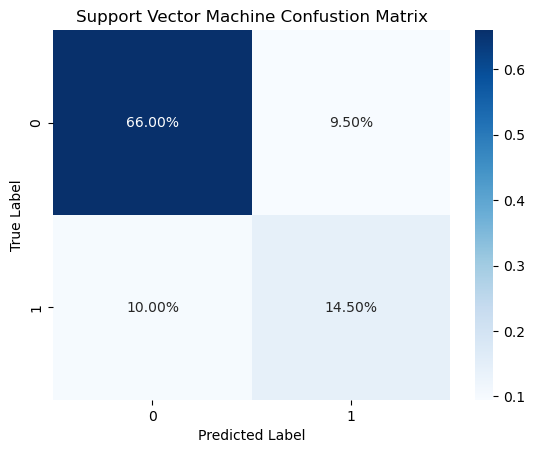

In [41]:
plt.figure()
sns.heatmap(svm_cm/np.sum(svm_cm), annot = True, fmt = '.2%',cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Support Vector Machine Confustion Matrix')

In [42]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
print('K-Nearest Neighbors\nAccuracy Score: ', knn_accuracy)

knn_cm = confusion_matrix(y_test,knn_pred)
print('\nConfusion Matrix:\n',svm_cm)

knn_class = classification_report(y_test,knn_pred)
print('\nClassification Report\n', knn_class)

K-Nearest Neighbors
Accuracy Score:  0.73

Confusion Matrix:
 [[132  19]
 [ 20  29]]

Classification Report
               precision    recall  f1-score   support

           N       0.77      0.92      0.84       151
           Y       0.37      0.14      0.21        49

    accuracy                           0.73       200
   macro avg       0.57      0.53      0.52       200
weighted avg       0.67      0.73      0.68       200



C:\Users\Cassa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 1.0, 'K-Nearest Neighbor Confustion Matrix')

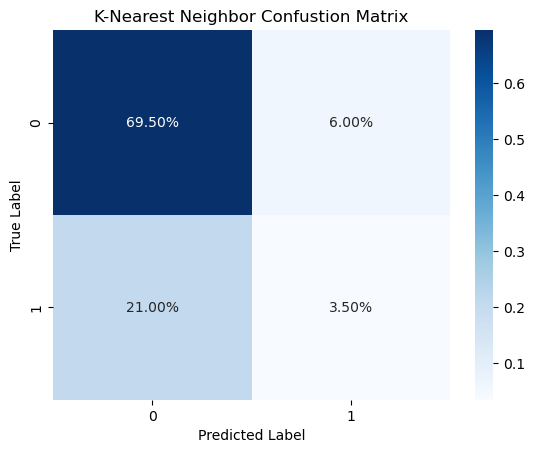

In [43]:
plt.figure()
sns.heatmap(knn_cm/np.sum(knn_cm), annot = True, fmt = '.2%',cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('K-Nearest Neighbor Confustion Matrix')

In [44]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print('Decision Tree Classifier\nAccuracy Score: ', dt_accuracy)

dt_cm = confusion_matrix(y_test,dt_pred)
print('\nConfusion Matrix:\n',dt_cm)

dt_class = classification_report(y_test,dt_pred)
print('\nClassification Report\n', dt_class)

Decision Tree Classifier
Accuracy Score:  0.68

Confusion Matrix:
 [[121  30]
 [ 34  15]]

Classification Report
               precision    recall  f1-score   support

           N       0.78      0.80      0.79       151
           Y       0.33      0.31      0.32        49

    accuracy                           0.68       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.67      0.68      0.68       200



Text(0.5, 1.0, 'Decision Tree Classifier Confustion Matrix')

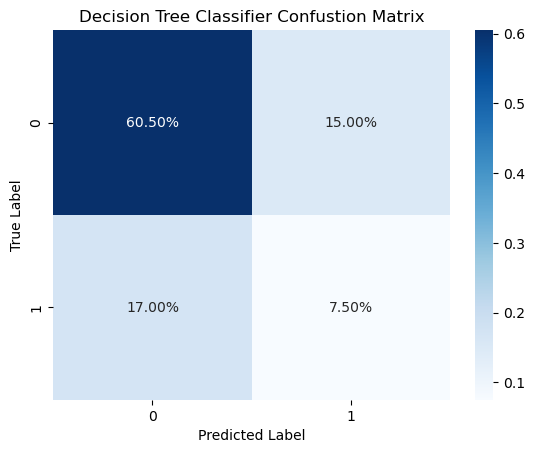

In [45]:
plt.figure()
sns.heatmap(dt_cm/np.sum(dt_cm), annot = True, fmt = '.2%',cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Decision Tree Classifier Confustion Matrix')

In [46]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Classifier\nAccuracy Score: ', rf_accuracy)

rf_cm = confusion_matrix(y_test,rf_pred)
print('\nConfusion Matrix:\n',rf_cm)

rf_class = classification_report(y_test,rf_pred)
print('\nClassification Report\n', rf_class)

Random Forest Classifier
Accuracy Score:  0.785

Confusion Matrix:
 [[139  12]
 [ 31  18]]

Classification Report
               precision    recall  f1-score   support

           N       0.82      0.92      0.87       151
           Y       0.60      0.37      0.46        49

    accuracy                           0.79       200
   macro avg       0.71      0.64      0.66       200
weighted avg       0.76      0.79      0.77       200



Text(0.5, 1.0, 'Random Forest Confustion Matrix')

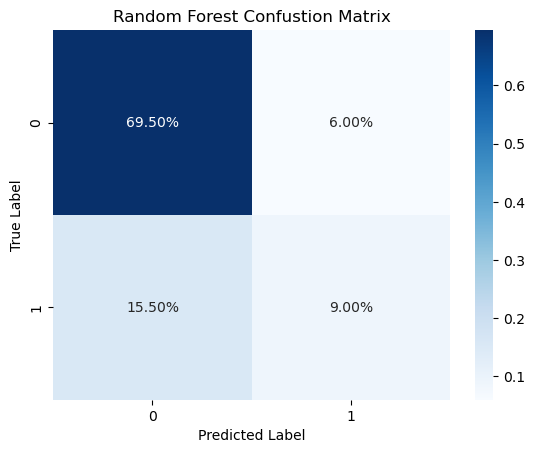

In [47]:
plt.figure()
sns.heatmap(rf_cm/np.sum(rf_cm),annot = True, fmt = '.2%', cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Random Forest Confustion Matrix')

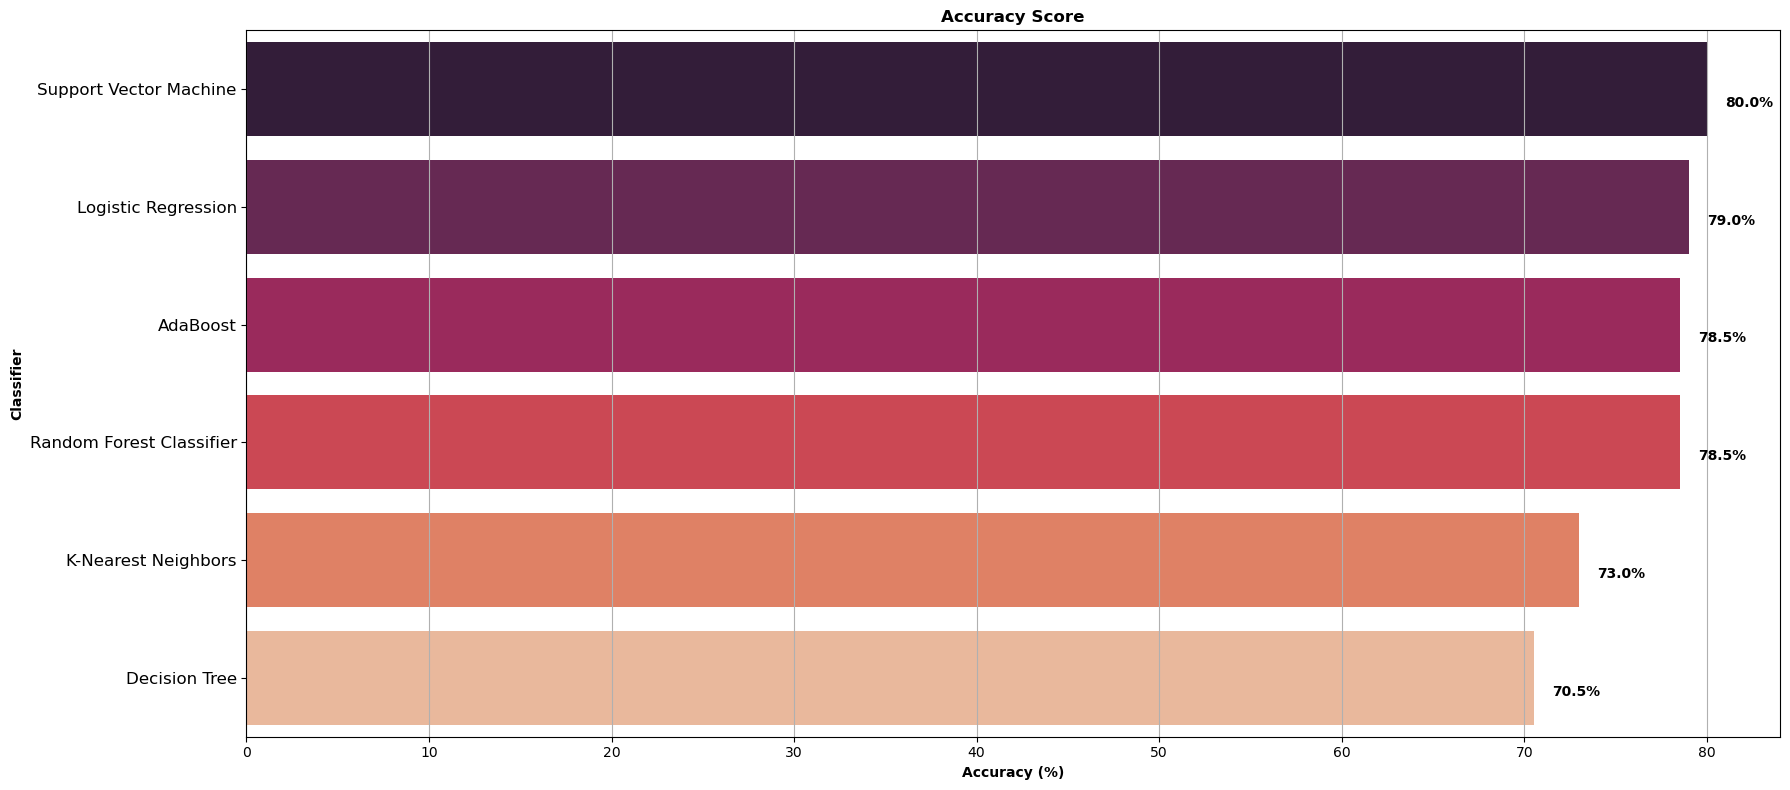

In [48]:


classifiers = ["Logistic Regression", "AdaBoost", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest Classifier"]
accuracy_means = [79, 78.5, 80, 73, 70.5, 78.5]

class_df = pd.DataFrame({"Classifier": classifiers, "Accuracy Score": accuracy_means})

class_df_sort = class_df.sort_values(by='Accuracy Score', ascending=False)

plt.figure(figsize=(18,8))
ax = sns.barplot(data=class_df_sort, x='Accuracy Score', y='Classifier', palette=sns.color_palette("rocket"))
ax.xaxis.grid()
ax.set_ylabel('Classifier', weight='bold')
ax.set_xlabel('Accuracy (%)', weight='bold')
ax.set_title('Accuracy Score', weight='bold')


plt.yticks(fontsize=12)
for i, v in enumerate(class_df_sort['Accuracy Score']):
    ax.text(v + 1, i + .15, str(v) + '%', color='black', fontweight='bold')

plt.tight_layout()
plt.show()




In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)
pca.transform(X_train)

n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

feature_names = X_train.columns

most_important_names = [feature_names[most_important[i]]for i in range(n_pcs)]

dic = {'Rank{}'.format(i): most_important_names[i] for i in range(n_pcs)}

important_df = pd.DataFrame(dic.items())
important_df

,0,1
0,Rank0,vehicle_claim
1,Rank1,incident_type_Single Vehicle Collision
2,Rank2,insured_sex_FEMALE
3,Rank3,police_report_available_NO
4,Rank4,property_damage_NO
5,Rank5,policy_csl_100/300
6,Rank6,policy_csl_500/1000
7,Rank7,authorities_contacted_Police
8,Rank8,policy_csl_250/500
9,Rank9,incident_severity_Major Damage


<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

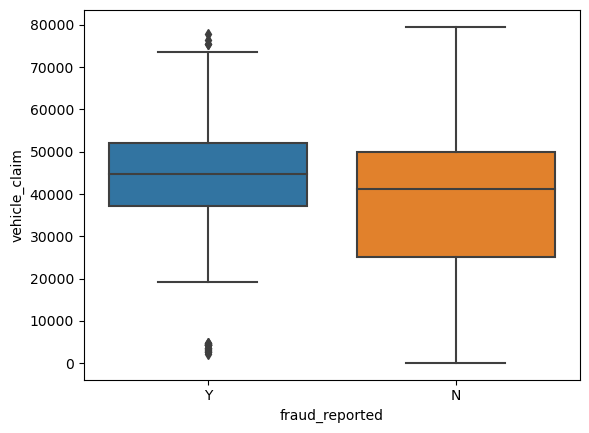

In [50]:
sns.boxplot(y="vehicle_claim", x=Y, data=Fraud_Cont)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
n = 10
feature_names = X_train.columns[indices][:n]
X_train_subset = X_train[feature_names]
rf_subset = RandomForestClassifier(n_estimators=100, random_state=42)
rf_subset.fit(X_train_subset, y_train)

tree = rf.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, 
                feature_names=X_train.columns,  
                class_names=['0', '1'],  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

InvocationException: GraphViz's executables not found